<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/class-activities/Class_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [26]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [27]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

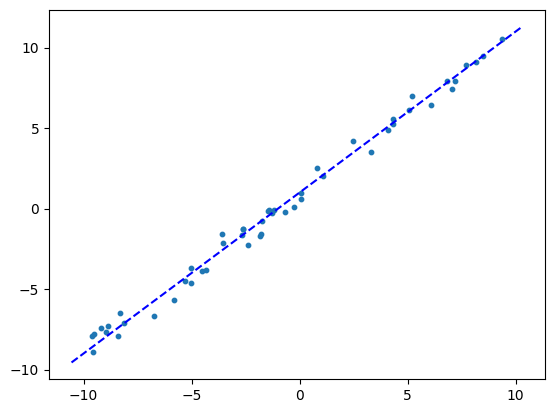

In [28]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [29]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [30]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [31]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[0.02078289, 0.00071643],
       [0.00071643, 0.00065562]])

In [32]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 1.82580818e-02,  1.48332067e-02,  1.41909650e-02,
         1.88661049e-02,  2.13708195e-02,  1.39447026e-02,
         2.74928541e-02,  1.99489662e-02,  1.47607174e-02,
         1.88993519e-02,  1.66263040e-02,  2.66177802e-02,
         2.44145769e-02,  2.37307705e-02,  1.69936847e-02,
         2.56735608e-02,  2.38744368e-02,  2.45111706e-02,
         1.97430355e-02,  2.68627497e-02,  1.71727734e-02,
         1.97622479e-02,  1.90590208e-02,  1.82236520e-02,
         2.08434733e-02,  1.39004230e-02,  2.58375355e-02,
         2.59223997e-02,  1.59651731e-02,  2.05939052e-02,
         1.75597161e-02,  1.49468503e-02,  1.95325976e-02,
         1.76813654e-02,  1.44465769e-02,  1.43658876e-02,
         1.71745006e-02,  2.02918207e-02,  2.38846207e-02,
         2.08391276e-02,  2.25657123e-02,  1.39576838e-02,
         1.94891757e-02,  2.15551954e-02,  2.31518609e-02,
         1.94700289e-02,  1.98567786e-02,  2.51325792e-02,
         1.89120608e-02,  2.62914168e-02],
       [-1.59

In [33]:
w = np.matmul(X_pi, Y)
w

array([0.96435405, 0.98960268])

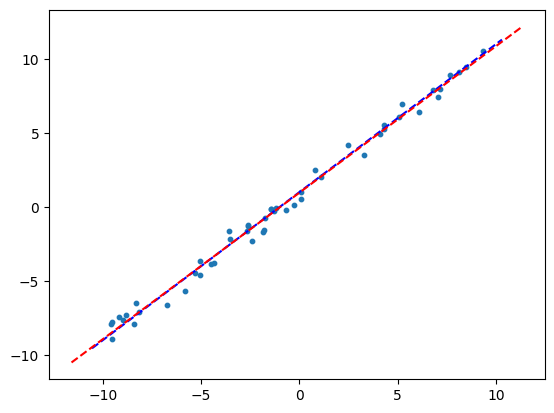

In [34]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [35]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))
MSE = np.sum(np.square(Y_pred - Y)) / N

In [36]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1613.9277186774627

In [37]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))
MSE_test = np.sum(np.square(Y_pred_test - Y_test)) / 50

In [38]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
MSE_target = np.sum(np.square(Y_pred_test_target - Y_test)) / 50
np.sum(np.square(Y_pred_test_target-Y_test))

16.087216710639265

In [39]:
Y_pred = np.matmul(X, w)
mse = np.sum(np.square(Y_pred - Y))
print("MSE with Ridge Regression:", mse)

w_other = [3, 2]
Y_other = np.matmul(X, w_other)
mse_other = np.sum(np.square(Y_other - Y))
print("MSE without regularization:", mse_other)

MSE with Ridge Regression: 13.38585926816926
MSE without regularization: 1613.9277186774627


In [40]:
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
mse_test = np.sum(np.square(Y_pred_test - Y_test))
print("MSE on test data with Ridge Regression:", mse_test)

MSE on test data with Ridge Regression: 17.2791532404371


In [41]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
mse_test_target = np.sum(np.square(Y_pred_test_target - Y_test))
print("MSE on test data without regularization:", mse_test_target)

MSE on test data without regularization: 16.96012396469292


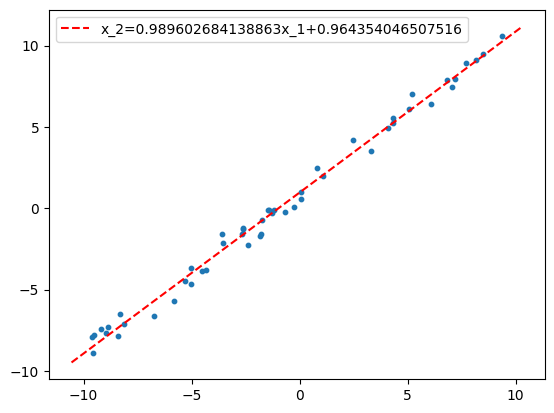

In [42]:
alpha = 0
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

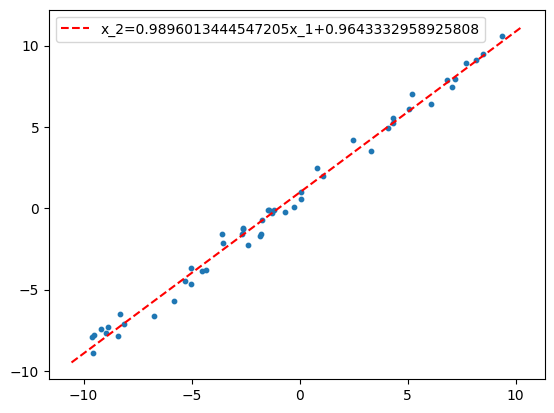

In [43]:
alpha = 0.001
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

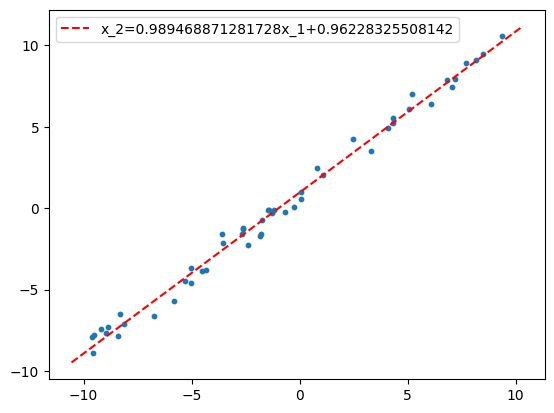

In [44]:
alpha = 0.1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

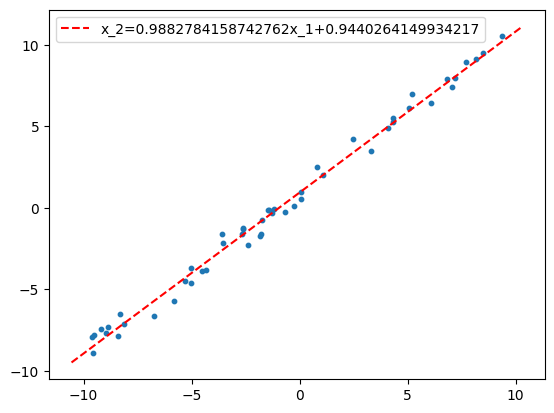

In [45]:
alpha = 1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()